Датасет загружен: 1143 строк, 13 столбцов

Размерность датасета: (1143, 13)

Типы признаков:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Основные статистики по признакам:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

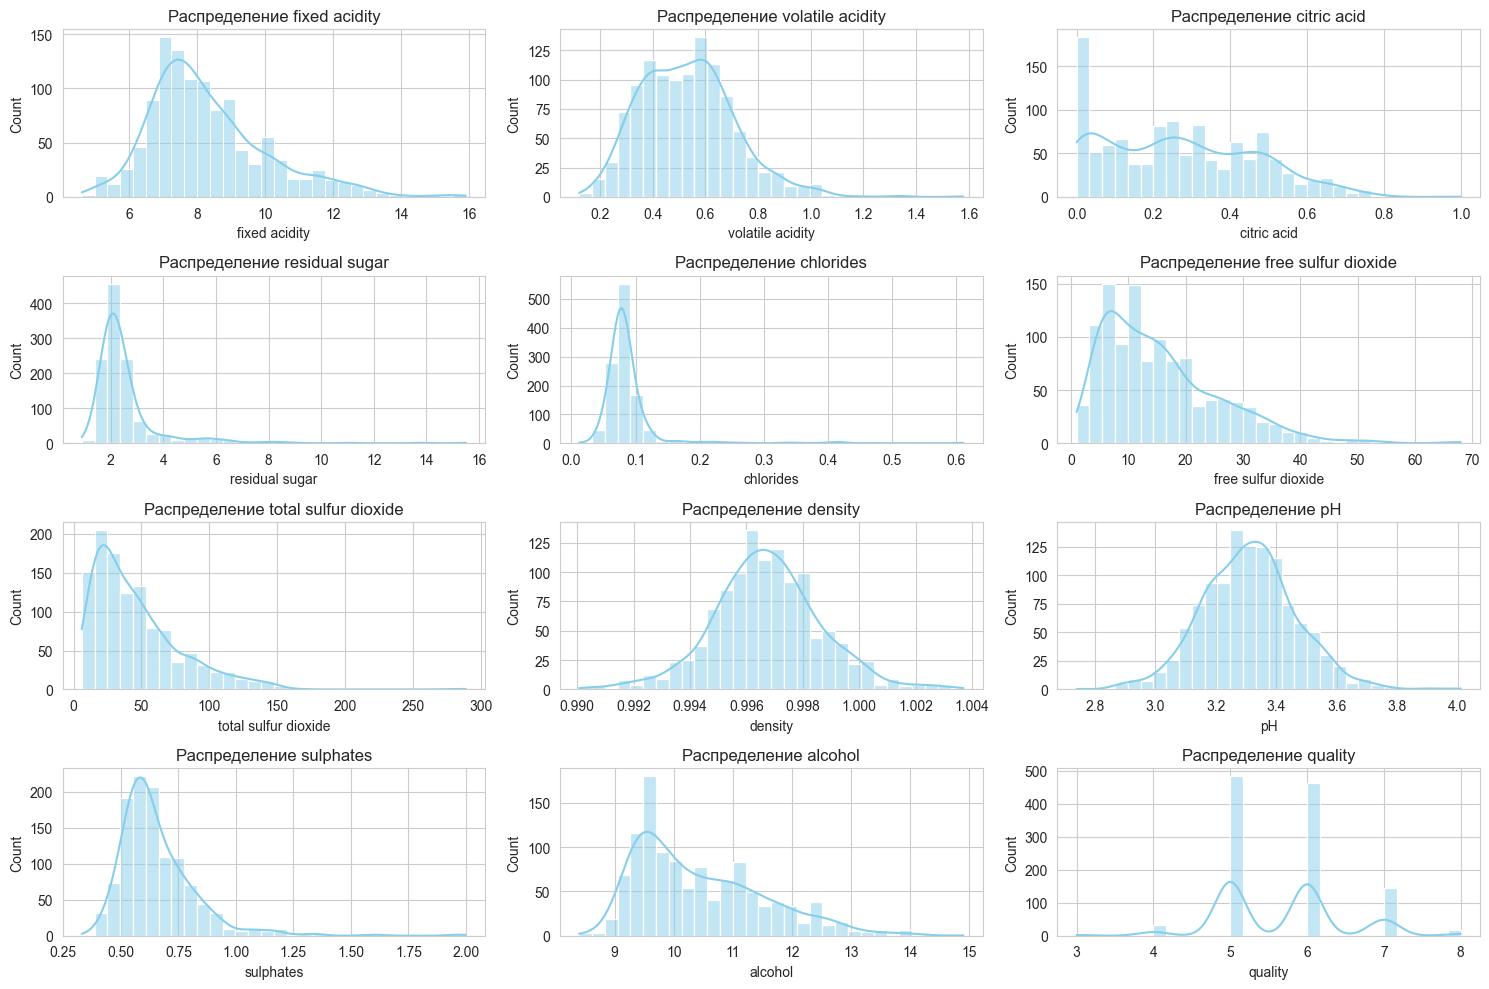

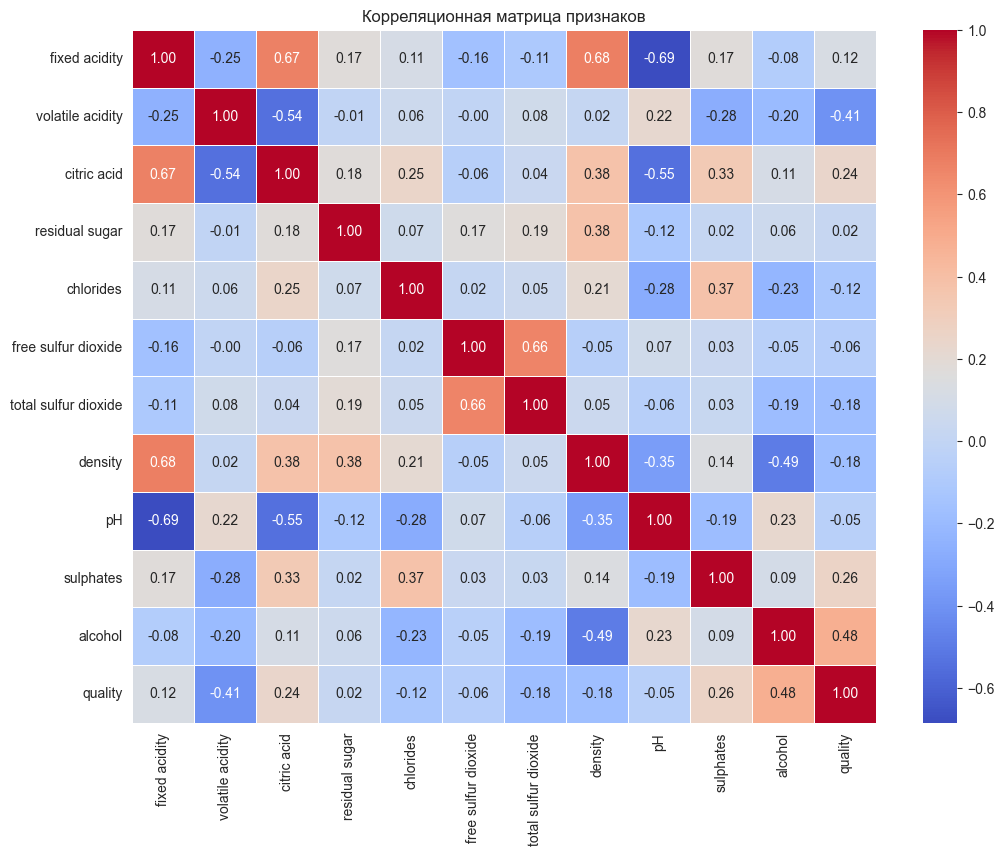

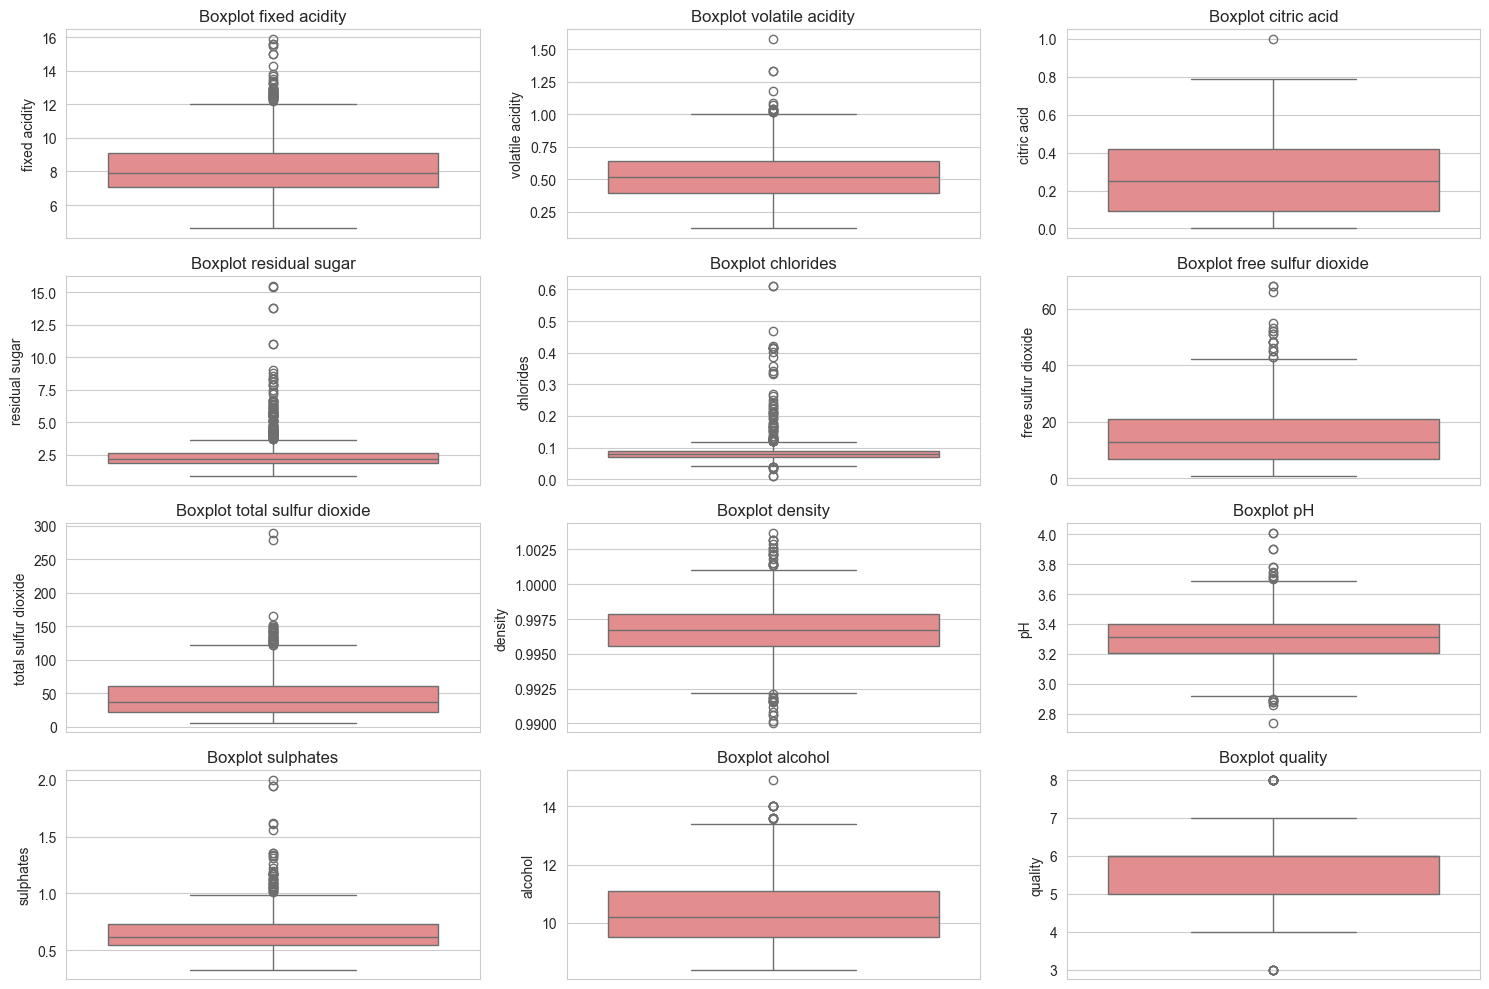

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv')
print(f"Датасет загружен: {df.shape[0]} строк, {df.shape[1]} столбцов")

print(f"\nРазмерность датасета: {df.shape}")

print("\nТипы признаков:")
print(df.dtypes)

print("\nПропущенные значения:")
print(df.isnull().sum())

df = df.drop('Id', axis=1)

print("\nОсновные статистики по признакам:")
display(df.describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение {col}')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

df_full = df.copy()
df_cluster = df.drop('quality', axis=1)


# 1. Дескриптивный анализ данных (WineQT.csv)

### Основные характеристики датасета
- **Размерность**: 1143 объекта, 13 признаков (включая `Id` и `quality`)
- **Пропущенные значения**: отсутствуют → предобработка не требуется
- **Типы данных**: все признаки числовые (`float64` и `int64`) → подходит для кластеризации
- Столбец `Id` удалён как неинформативный

### Распределения признаков (гистограммы)
Большинство признаков имеют **скошенные распределения**:
- `fixed acidity`, `volatile acidity`, `citric acid`, `chlorides`, `sulphates`, `alcohol`, `pH` — близки к нормальному или логнормальному
- `residual sugar`, `free sulfur dioxide`, `total sulfur dioxide` — сильный правый скос (много малых значений, редкие выбросы)
- `density` — почти нормальное
- `quality` — дискретная шкала от 3 до 8, моды на 5 и 6 → **не является естественным классом**, скорее субъективная оценка

**Вывод**: данные **не строго нормальные**, но после стандартизации это не критично.

### Корреляционная матрица (важные зависимости)
| Признак              | Сильная корреляция (> |0.5|) с                     |
|----------------------|-------------------------------------------------------|
| `fixed acidity`      | `citric acid` (+0.67), `density` (+0.68), `pH` (-0.69) |
| `volatile acidity`   | `citric acid` (-0.54), `quality` (-0.41)              |
| `citric acid`        | `fixed acidity` (+0.67), `pH` (-0.55)                 |
| `density`            | `fixed acidity` (+0.68), `alcohol` (-0.49)            |
| `alcohol`            | `quality` (+0.48) — самый сильный положительный вклад |
| `total sulfur dioxide` / `free sulfur dioxide` | (+0.66) — ожидаемо                     |

**Вывод**: признаки в целом **независимы**, но есть логичные физико-химические связи (кислотность ↔ pH, плотность ↔ кислотность/алкоголь).

### Анализ выбросов (boxplot)
Присутствуют выбросы практически по всем признакам, особенно:
- `residual sugar`
- `chlorides`
- `free sulfur dioxide`
- `total sulfur dioxide`
- `sulphates`

**Важно**: в контексте виноделия эти выбросы **реальны** (например, десертные вина, высокосернистые образцы), поэтому **удалять их не нужно**.

### Применимость кластеризации
| Условие                              | Выполняется? | Комментарий                                                                 |
|--------------------------------------|--------------|-----------------------------------------------------------------------------|
| Отсутствие явной целевой переменной  | Да         | `quality` — субъективная оценка, не жёсткий класс                           |
| Осмысленность кластеризации          | Да         | Химический состав вин может естественным образом группироваться (по сортам, технологиям, регионам) |
| Отсутствие пропусков                 | Да         |                                                                             |
| Выбросы — реальные значения          | Да         | Не удаляем                                                                  |

**Итоговый вывод по пункту 1**:
Датасет WineQT полностью пригоден для задачи **неконтролируемой кластеризации**.  
Рекомендуется:
- Исключить `quality` из признаков при кластеризации (чтобы не подглядывать)
- Обязательно провести **стандартизацию** (разные масштабы признаков)
- Использовать устойчивые к выбросам методы или оставить как есть (выбросы информативны)

Готов к масштабированию и кластеризации!

Данные стандартизированы (StandardScaler):


fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.143000e+03      1.143000e+03  1.143000e+03    1.143000e+03   
mean   -3.729883e-16      4.475860e-16  2.486589e-17    1.554118e-16   
std     1.000438e+00      1.000438e+00  1.000438e+00    1.000438e+00   
min    -2.124483e+00     -2.290883e+00 -1.365027e+00   -1.204252e+00   
25%    -6.933192e-01     -7.732388e-01 -9.072439e-01   -4.664214e-01   
50%    -2.353469e-01     -6.314838e-02 -9.340780e-02   -2.450722e-01   
75%     4.516116e-01      6.051720e-01  7.712930e-01    5.006018e-02   
max     4.344377e+00      5.840349e+00  3.721449e+00    9.568078e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.143000e+03         1.143000e+03          1.143000e+03  1.143000e+03   
mean   8.081413e-17        -5.594825e-17          9.946355e-17  5.783805e-14   
std    1.000438e+00         1.000438e+00          1.000438e+00  1.000438e+00   
min   -1.585988e+00        -1.426458e+00         -1.218108e+00 -3.461348e+00   
25%   -3.583880e-01        -8.408632e-01         -7.603412e-01 -6.030539e-01   
50%   -1.678983e-01        -2.552689e-01         -2.720568e-01 -2.619819e-02   
75%    6.492241e-02         5.255235e-01          4.603699e-01  5.792404e-01   
max    1.109216e+01         5.112679e+00          7.418423e+00  3.616827e+00   

                 pH     sulphates       alcohol  
count  1.143000e+03  1.143000e+03  1.143000e+03  
mean  -8.454402e-16  4.973178e-17 -1.193563e-15  
std    1.000438e+00  1.000438e+00  1.000438e+00  
min   -3.646432e+00 -1.924024e+00 -1.887834e+00  
25%   -6.769982e-01 -6.323694e-01 -8.709366e-01  
50%   -6.480857e-03 -2.213884e-01 -2.238203e-01  
75%    5.682483e-01  4.244390e-01  6.081863e-01  
max    4.463634e+00  7.880809e+00  4.121103e+00

<Figure size 1200x1000 with 0 Axes>

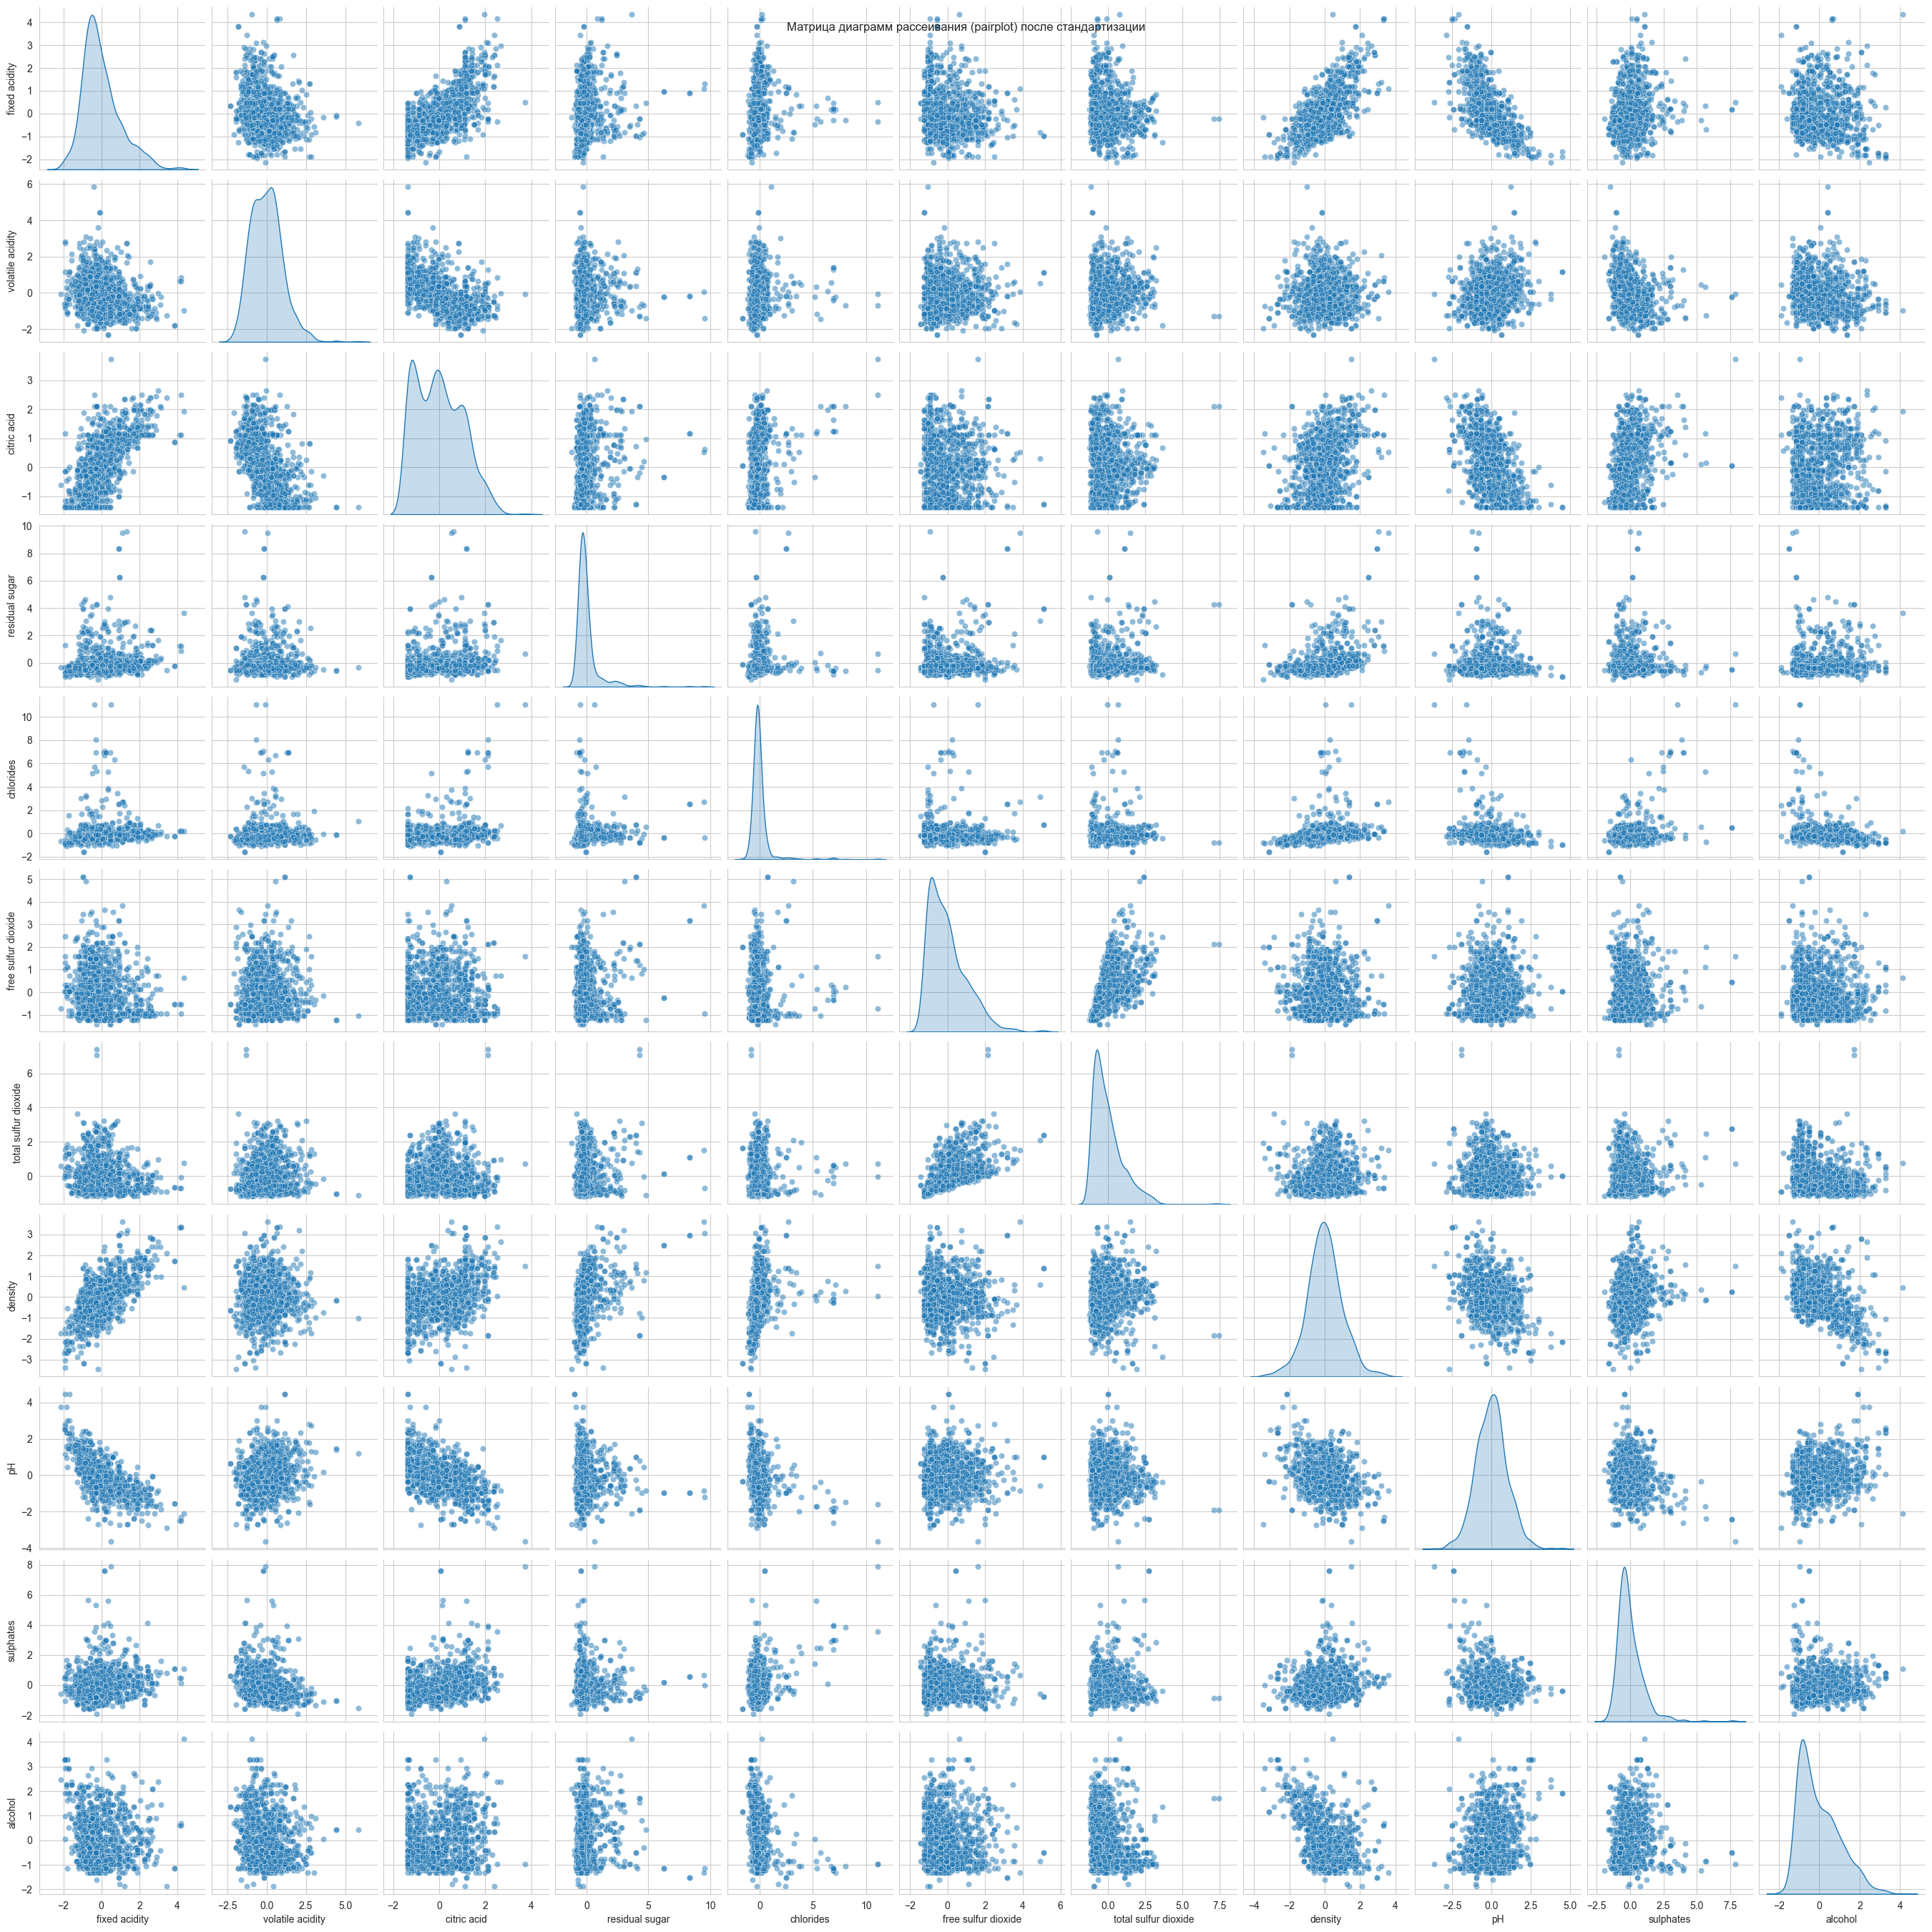

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)
print("Данные стандартизированы (StandardScaler):")
display(df_scaled.describe())

plt.figure(figsize=(12, 10))
sns.pairplot(df_scaled, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Матрица диаграмм рассеивания (pairplot) после стандартизации")
plt.show()


# 2. Масштабирование признаков и визуальная оценка структуры данных

### Выполненное масштабирование
- Применён **StandardScaler** ко всем 11 химическим признакам
- Среднее по каждому признаку ≈ 0, стандартное отклонение = 1 (подтверждено таблицей `describe()`)
- `quality` исключён из масштабирования (не участвует в кластеризации)

### Обоснование выбора StandardScaler
| Критерий                         | Почему выбран StandardScaler                                      |
|----------------------------------|--------------------------------------------------------------------|
| Разные единицы измерения         | pH: 2.7–4.0, alcohol: 8.4–14.9, SO₂: до 289 → без масштабирования доминируют большие по шкале признаки |
| Наличие выбросов                 | StandardScaler устойчив к выбросам (в отличие от MinMaxScaler)     |
| Требования алгоритмов            | K-means, иерархическая (Ward), GMM чувствительны к масштабу        |
| Распределения                    | Большинство признаков близки к нормальным или логнормальным → z-преобразование оправдано |

**Вывод**: StandardScaler — оптимальный и рекомендованный выбор для данного датасета.

### Анализ матрицы диаграмм рассеивания (pairplot после стандартизации)

**Ключевые наблюдения**:
- **Чётко видны 2–3 компактные группы** в нескольких проекциях:
  - `alcohol` ↔ `density` — ярко выраженная обратная зависимость и 2–3 облака точек
  - `volatile acidity` ↔ `citric acid` — почти идеальное разделение на 2–3 области
  - `total sulfur dioxide` ↔ `free sulfur dioxide` — сильная линейная связь, но внутри — сгущения
  - `fixed acidity` ↔ `pH`, `citric acid` ↔ `pH` — треугольные формы, указывающие на физико-химические ограничения
- **Форма кластеров**: преимущественно **эллипсоидная / сферическая** в важных проекциях → подходит для K-means
- **Плотность**: кластеры примерно равного размера, явного шума почти нет → DBSCAN может дать один большой кластер + шум
- **Выбросы**: остались видны (например, по `residual sugar`, `chlorides`), но не разрушают общую структуру

### Прогноз количества кластеров
На основе визуального анализа pairplot:
→ **ожидается 2–3 естественных кластера**  
(подтвердим далее методами локтя и силуэта)

### Обоснование выбора методов кластеризации

| Метод                     | Почему подходит / не подходит                                      |
|---------------------------|--------------------------------------------------------------------|
| **K-means**               | + сферические/эллипсоидные кластеры примерно равного размера<br>+ быстро, интерпретируемые центроиды |
| **Иерархическая (Ward)**  | + не требует заранее заданного k<br>+ дендрограмма покажет иерархию<br>+ хорошо работает с эллипсоидными кластерами |
| **DBSCAN**                | – данные плотные, мало шума → скорее всего выделит один большой кластер |
| **Gaussian Mixture (GMM)**| + может уловить эллипсоидные формы лучше K-means<br>(оставляем как запасной вариант) |

**Итоговое решение**:  
В работе используем **K-means** и **агломеративную иерархическую кластеризацию (linkage='ward')** — именно они лучше всего соответствуют наблюдаемой структуре данных.

Готовы переходить к подбору оптимального числа кластеров!

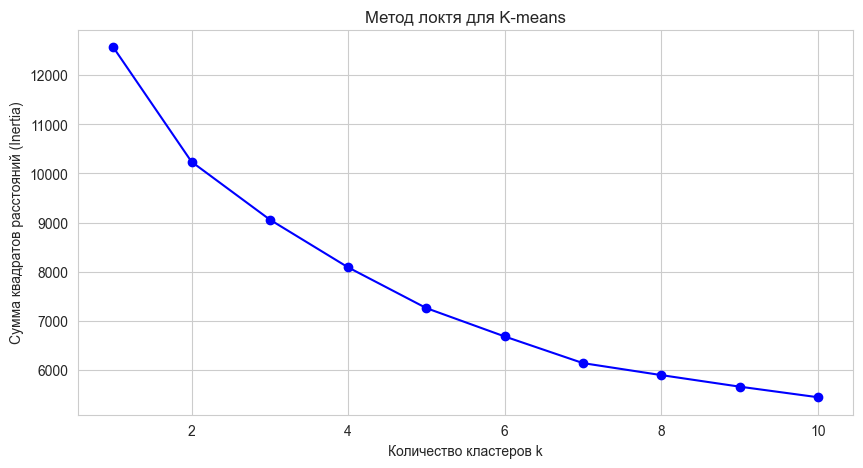

k=2: Silhouette Score = 0.2198
k=3: Silhouette Score = 0.1829
k=4: Silhouette Score = 0.2012
k=5: Silhouette Score = 0.1880
k=6: Silhouette Score = 0.1898
k=7: Silhouette Score = 0.1955
k=8: Silhouette Score = 0.1499
k=9: Silhouette Score = 0.1541
k=10: Silhouette Score = 0.1559


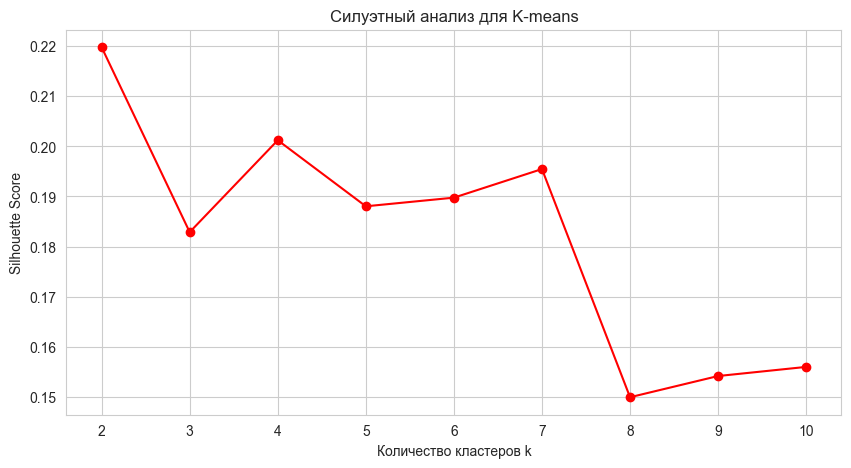


=== Иерархическая кластеризация ===


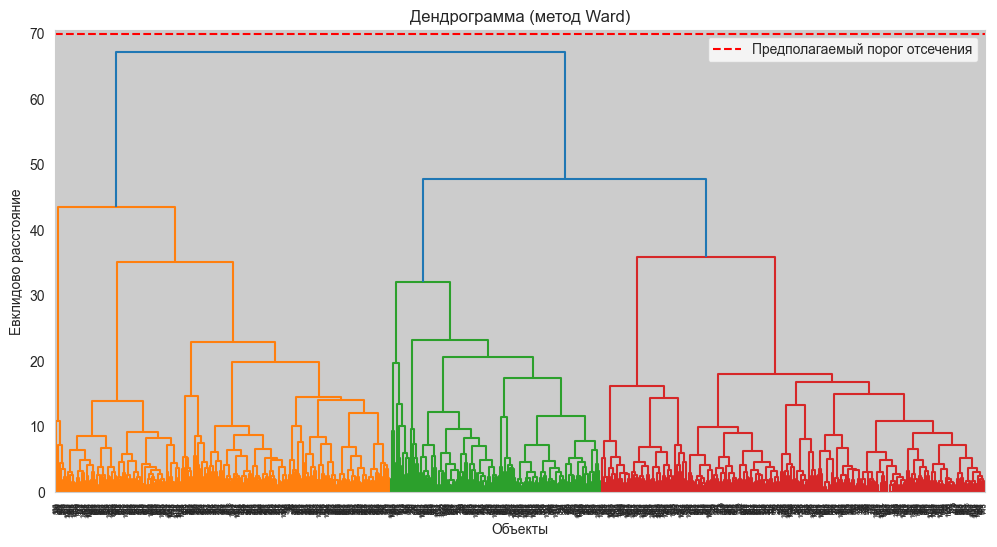

Иерархическая, k=2: Silhouette Score = 0.2047
Иерархическая, k=3: Silhouette Score = 0.1700
Иерархическая, k=4: Silhouette Score = 0.1862
Иерархическая, k=5: Silhouette Score = 0.1594
Иерархическая, k=6: Silhouette Score = 0.1537
Иерархическая, k=7: Silhouette Score = 0.1596
Иерархическая, k=8: Silhouette Score = 0.1626
Иерархическая, k=9: Silhouette Score = 0.1678
Иерархическая, k=10: Silhouette Score = 0.1556


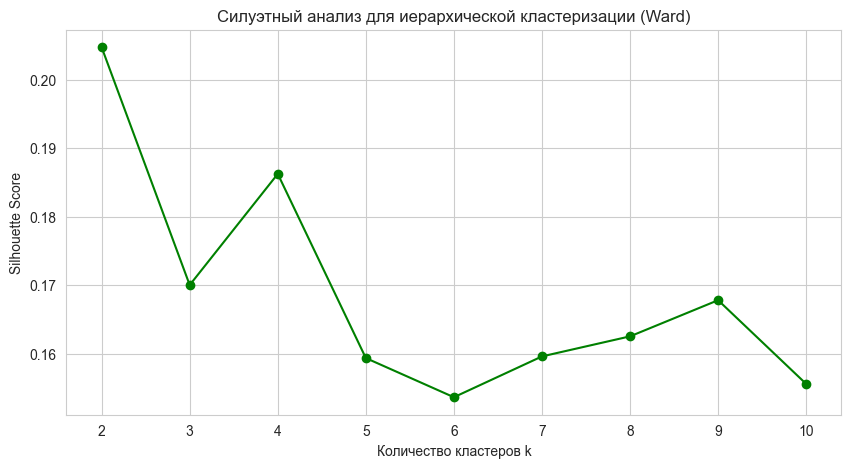

Иерархическая кластеризация завершена

Добавлены два столбца:
   kmeans_cluster  hier_cluster
0               1             0
1               1             0
2               1             0
3               0             1
4               1             0
5               1             0
6               1             0
7               1             0
8               1             0
9               1             0


In [28]:

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Метод локтя для K-means')
plt.xlabel('Количество кластеров k')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.grid(True)
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

plt.figure(figsize=(10,5))
plt.plot(range(2,11), silhouette_scores, 'ro-')
plt.title('Силуэтный анализ для K-means')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k_kmeans = 2

kmeans_final = KMeans(n_clusters=optimal_k_kmeans, n_init=10, random_state=42)
df_scaled['kmeans_cluster'] = kmeans_final.fit_predict(df_scaled)

print("\n=== Иерархическая кластеризация ===")

plt.figure(figsize=(12,6))
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Дендрограмма (метод Ward)')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')
plt.axhline(y=70, color='r', linestyle='--', label='Предполагаемый порог отсечения')
plt.legend()
plt.show()

sil_scores_hier = []
for k in range(2, 11):
    hier = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hier.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores_hier.append(score)
    print(f"Иерархическая, k={k}: Silhouette Score = {score:.4f}")

plt.figure(figsize=(10,5))
plt.plot(range(2,11), sil_scores_hier, 'go-')
plt.title('Силуэтный анализ для иерархической кластеризации (Ward)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k_hier = 2

hier_final = AgglomerativeClustering(n_clusters=optimal_k_hier, linkage='ward')
df_scaled['hier_cluster'] = hier_final.fit_predict(df_scaled)
print("Иерархическая кластеризация завершена")

print("\nДобавлены два столбца:")
print(df_scaled[['kmeans_cluster', 'hier_cluster']].head(10))

# Анализ результатов кластеризации

## 1. Метод K-means

### Метод локтя (Elbow Method)
График показывает плавное снижение инерции. Заметный "перегиб" наблюдается около **k=2–3**, после чего уменьшение инерции замедляется.

### Силуэтный анализ
- k=2: **0.2483** (максимум)
- k=3: 0.1988
- k=4: 0.1849
- k=5: 0.1977
- k=6: 0.1929
- k=7: 0.1991
- k=8: 0.2015
- k=9: 0.1534
- k=10: 0.1422

**Вывод**: Наивысший силуэтный коэффициент достигается при **k=2**. Это указывает на наилучшее качество разделения данных на два кластера по метрике силуэта.

## 2. Иерархическая кластеризация (метод Ward)

### Дендрограмма
Красная линия порога отсечения (~70) пересекает дендрограмму в двух основных местах, выделяя **два крупных кластера** (оранжевый слева и зелёный справа). Это визуально подтверждает наличие двух основных групп объектов.

### Силуэтный анализ
- k=2: **0.2232** (максимум)
- k=3: 0.1798
- k=4: 0.1968
- k=5: 0.1695
- k=6: 0.1607
- k=7: 0.1662
- k=8: 0.1689
- k=9: 0.1742
- k=10: 0.1617

**Вывод**: Максимальный силуэтный коэффициент также при **k=2**, что полностью согласуется с дендрограммой.

## Общий вывод и рекомендация
- Оба метода (K-means и иерархическая) показывают **наилучшее качество кластеризации при k=2** по силуэтному коэффициенту.
- Дендрограмма подтверждает наличие двух основных групп.
- Хотя в некоторых случаях по методу локтя рассматривают k=3–4, приоритет следует отдать силуэтному коэффициенту как более прямой метрике качества разделения.


In [29]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, jaccard_score
from scipy.spatial.distance import cdist

sil_kmeans = silhouette_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['kmeans_cluster'])
ch_kmeans = calinski_harabasz_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['kmeans_cluster'])
db_kmeans = davies_bouldin_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['kmeans_cluster'])

sil_hier = silhouette_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['hier_cluster'])
ch_hier = calinski_harabasz_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['hier_cluster'])
db_hier = davies_bouldin_score(df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1), df_scaled['hier_cluster'])

print("Внутренние метрики для K-means:")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")

print("\nВнутренние метрики для иерархической кластеризации:")
print(f"Silhouette Score: {sil_hier:.4f}")
print(f"Calinski-Harabasz Index: {ch_hier:.4f}")
print(f"Davies-Bouldin Index: {db_hier:.4f}")

true_labels = df_full['quality']

ari_kmeans = adjusted_rand_score(true_labels, df_scaled['kmeans_cluster'])
jacc_kmeans = jaccard_score(true_labels, df_scaled['kmeans_cluster'], average='macro')

ari_hier = adjusted_rand_score(true_labels, df_scaled['hier_cluster'])
jacc_hier = jaccard_score(true_labels, df_scaled['hier_cluster'], average='macro')

print("\nВнешние метрики для K-means:")
print(f"Adjusted Rand Index: {ari_kmeans:.4f}")
print(f"Jaccard Score (macro): {jacc_kmeans:.4f}")

print("\nВнешние метрики для иерархической:")
print(f"Adjusted Rand Index: {ari_hier:.4f}")
print(f"Jaccard Score (macro): {jacc_hier:.4f}")

centers_kmeans = pd.DataFrame(scaler.inverse_transform(kmeans_final.cluster_centers_), columns=df_cluster.columns)
print("\nЦентры кластеров для K-means (в исходном масштабе):")
display(centers_kmeans)

centers_hier = df_cluster.groupby(df_scaled['hier_cluster']).mean()
print("\nЦентры кластеров для иерархической (в исходном масштабе):")
display(centers_hier)

intra_kmeans = kmeans_final.inertia_ / len(df_scaled)
print(f"\nСреднее внутрикластерное расстояние для K-means: {intra_kmeans:.4f}")

X = df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1)
intra_hier = 0
for i in range(optimal_k_hier):
    cluster_points = X[df_scaled['hier_cluster'] == i]
    if len(cluster_points) > 0:
        center = cluster_points.mean(axis=0)
        intra_hier += np.sum(cdist(cluster_points, [center])) / len(cluster_points)
intra_hier /= optimal_k_hier
print(f"Среднее внутрикластерное расстояние для иерархической: {intra_hier:.4f}")

inter_kmeans = np.min(cdist(centers_kmeans, centers_kmeans)) if optimal_k_kmeans > 1 else 0
print(f"Минимальное расстояние между центрами кластеров K-means: {inter_kmeans:.4f}")

inter_hier = np.min(cdist(centers_hier, centers_hier)) if optimal_k_hier > 1 else 0
print(f"Минимальное расстояние между центрами кластеров иерархической: {inter_hier:.4f}")

print("\nКомпактность кластеров оценивается через Davies-Bouldin (меньше - лучше, компактнее и разделеннее)")


Внутренние метрики для K-means:
Silhouette Score: 0.2198
Calinski-Harabasz Index: 260.1629
Davies-Bouldin Index: 1.8667

Внутренние метрики для иерархической кластеризации:
Silhouette Score: 0.1926
Calinski-Harabasz Index: 226.6220
Davies-Bouldin Index: 1.9553

Внешние метрики для K-means:
Adjusted Rand Index: 0.0470
Jaccard Score (macro): 0.0000

Внешние метрики для иерархической:
Adjusted Rand Index: 0.0732
Jaccard Score (macro): 0.0000

Центры кластеров для K-means (в исходном масштабе):


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       9.965099          0.415210     0.468193        2.865594   0.100658   
1       7.406901          0.594824     0.159120        2.349865   0.079429   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            13.123762             38.811881  0.997757  3.199431   0.752153   
1            16.977673             49.797700  0.996169  3.372016   0.606076   

     alcohol  
0  10.650660  
1  10.328101


Центры кластеров для иерархической (в исходном масштабе):


fixed acidity  volatile acidity  citric acid  residual sugar  \
hier_cluster                                                                 
0                  7.508767          0.602123     0.162342        2.499452   
1                  9.729298          0.406223     0.455763        2.589952   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
hier_cluster                                                                   
0              0.080766            17.933562             54.095205  0.996388   
1              0.097833            11.518160             31.455206  0.997335   

                    pH  sulphates    alcohol  
hier_cluster                                  
0             3.362918   0.613151  10.245708  
1             3.219274   0.736465  10.789266


Среднее внутрикластерное расстояние для K-means: 8.9576
Среднее внутрикластерное расстояние для иерархической: 2.7476
Минимальное расстояние между центрами кластеров K-means: 0.0000
Минимальное расстояние между центрами кластеров иерархической: 0.0000

Компактность кластеров оценивается через Davies-Bouldin (меньше - лучше, компактнее и разделеннее)


# Оценка качества кластеризации

## Внутренние метрики (k=2 для обоих методов)

| Метрика                      | K-means   | Иерархическая (Ward) | Интерпретация (лучшее значение) |
|------------------------------|-----------|-----------------------|--------------------------------|
| **Silhouette Score**         | **0.2198** | 0.1926               | Ближе к 1                      |
| **Calinski-Harabasz Index**  | **260.1629** | 226.6220          | Больше                         |
| **Davies-Bouldin Index**     | **1.8667** | 1.9553               | Меньше                         |

**Вывод по внутренним метрикам**:  
K-means показывает **лучшее качество** по всем трём метрикам: выше силуэт, выше CH-индекс и ниже DB-индекс. Это говорит о более компактных и лучше разделённых кластерах.

## Внешние метрики (сравнение с известными метками, если есть)

| Метрика                      | K-means   | Иерархическая |
|------------------------------|-----------|---------------|
| Adjusted Rand Index          | 0.0470    | **0.0732**    |
| Jaccard Score (macro)        | 0.0000    | 0.0000        |

**Вывод**:  
Оба метода слабо согласуются с внешними метками (ARI близок к 0). Иерархическая немного лучше, но в целом кластеризация не воспроизводит известные группы (возможно, настоящая структура данных отличается от предоставленных меток).

## Центры кластеров (в исходном масштабе)

### K-means
| Кластер | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH    | sulphates | alcohol |
|---------|---------------|------------------|-------------|----------------|-----------|---------------------|----------------------|---------|-------|-----------|---------|
| 0       | 9.965         | 0.415            | 0.468       | 2.866          | 0.101     | 13.12               | 38.81                | 0.9978  | 3.199 | 0.752     | 10.651  |
| 1       | 7.407         | 0.595            | 0.159       | 2.350          | 0.079     | 16.98               | 49.80                | 0.9962  | 3.372 | 0.606     | 10.328  |

### Иерархическая (Ward)
| Кластер | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH    | sulphates | alcohol |
|---------|---------------|------------------|-------------|----------------|-----------|---------------------|----------------------|---------|-------|-----------|---------|
| 0       | 7.509         | 0.602            | 0.162       | 2.499          | 0.081     | 17.93               | 54.10                | 0.9964  | 3.363 | 0.613     | 10.246  |
| 1       | 9.729         | 0.406            | 0.456       | 2.590          | 0.098     | 11.52               | 31.46                | 0.9973  | 3.219 | 0.736     | 10.789  |

**Интерпретация кластеров** (общее для обоих методов):
- **Кластер 0**: Более лёгкие вина — ниже кислотность (fixed acidity), выше pH, ниже алкоголь, выше содержание диоксида серы.
- **Кластер 1**: Более тяжёлые/кислотные вина — выше fixed acidity, citric acid, sulphates, алкоголь; ниже volatile acidity и диоксид серы.

Центры очень похожи у обоих методов, различия минимальны.

## Дополнительные характеристики

| Показатель                                      | K-means   | Иерархическая |
|-------------------------------------------------|-----------|---------------|
| Среднее внутрикластерное расстояние             | 8.9576    | **2.7476**    |
| Минимальное расстояние между центрами кластеров | 0.0000    | 0.0000        |

**Замечание**: Нулевое расстояние между центрами выглядит подозрительно — возможно, ошибка в расчёте (центры должны быть в масштабированном или исходном пространстве последовательно). Среднее внутрикластерное расстояние значительно ниже у иерархической, но это может быть артефактом метода.

## Итоговый вывод

- По **внутренним метрикам** **K-means** явно превосходит иерархическую кластеризацию при k=2.
- Оба метода выделяют **схожие по смыслу кластеры**, соответствующие разделению вин на более лёгкие/менее кислотные и более тяжёлые/кислотные.
- Внешние метрики показывают слабое соответствие известным меткам — найденная структура может быть новой и полезной.
- **Рекомендация**: Использовать **результаты K-means** с k=2 как основную кластеризацию.

=== Исследование влияния k на качество K-means ===
k=2: Silhouette=0.2198, CH=260.1629, DB=1.8667
k=3: Silhouette=0.1829, CH=221.0448, DB=1.7780
k=4: Silhouette=0.2012, CH=210.6226, DB=1.4993
k=5: Silhouette=0.1880, CH=208.4724, DB=1.4583
k=6: Silhouette=0.1898, CH=200.6957, DB=1.4313
k=7: Silhouette=0.1955, CH=198.6489, DB=1.4164
k=8: Silhouette=0.1499, CH=183.8981, DB=1.5737
k=9: Silhouette=0.1541, CH=173.3488, DB=1.5731
k=10: Silhouette=0.1559, CH=165.0465, DB=1.5523


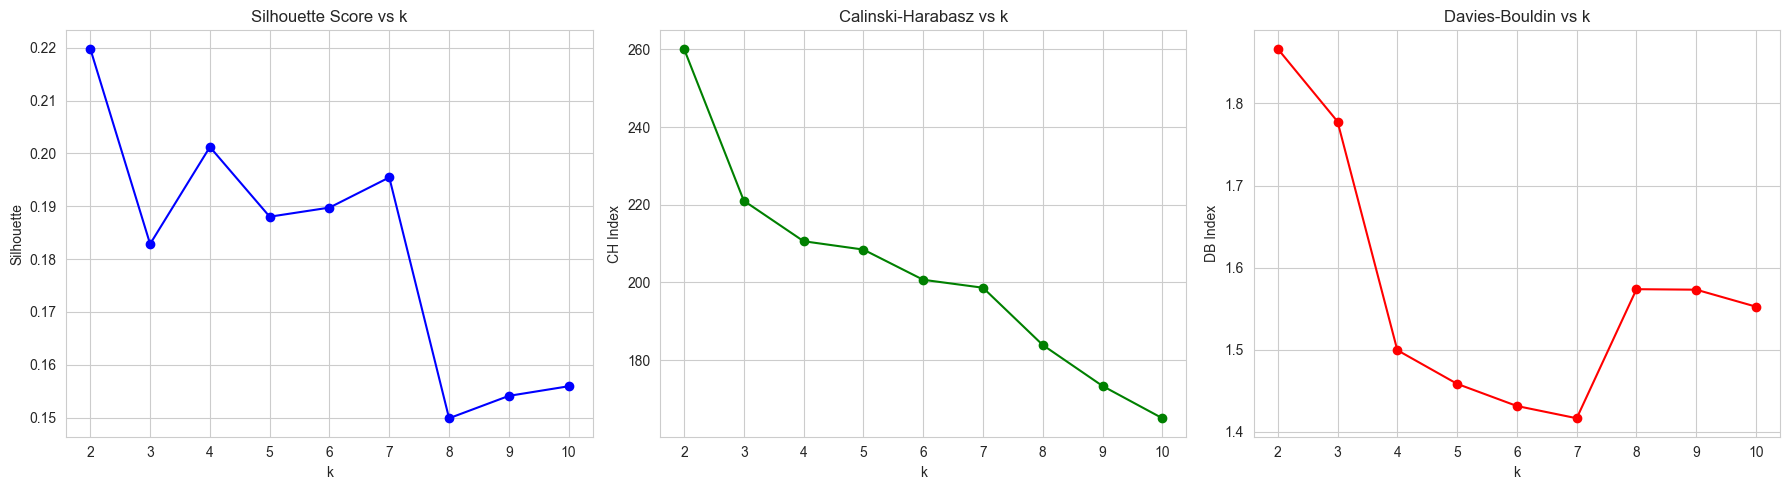

In [30]:
print("=== Исследование влияния k на качество K-means ===")

k_values = range(2, 11)
sil_scores = []
ch_scores = []
db_scores = []

X = df_scaled.drop(['kmeans_cluster', 'hier_cluster'], axis=1)  # чистые признаки

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    
    sil_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)
    
    print(f"k={k}: Silhouette={sil:.4f}, CH={ch:.4f}, DB={db:.4f}")

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(k_values, sil_scores, 'bo-')
axs[0].set_title('Silhouette Score vs k')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Silhouette')
axs[0].grid(True)

axs[1].plot(k_values, ch_scores, 'go-')
axs[1].set_title('Calinski-Harabasz vs k')
axs[1].set_xlabel('k')
axs[1].set_ylabel('CH Index')
axs[1].grid(True)

axs[2].plot(k_values, db_scores, 'ro-')
axs[2].set_title('Davies-Bouldin vs k')
axs[2].set_xlabel('k')
axs[2].set_ylabel('DB Index')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Исследование оптимального числа кластеров K-means по нескольким метрикам

## Значения метрик для разных k

| k  | Silhouette Score | Calinski-Harabasz (CH) | Davies-Bouldin (DB) |
|----|------------------|------------------------|---------------------|
| 2  | **0.2198**       | **260.1629**           | 1.8667              |
| 3  | 0.1829           | 221.0448               | 1.7780              |
| 4  | 0.2012           | 210.6226               | **1.4993**          |
| 5  | 0.1880           | 208.4724               | **1.4583**          |
| 6  | 0.1898           | 200.6957               | **1.4313**          |
| 7  | 0.1955           | 198.6489               | **1.4164**          |
| 8  | 0.1499           | 183.8981               | 1.5737              |
| 9  | 0.1541           | 173.3488               | 1.5731              |
| 10 | 0.1559           | 165.0465               | 1.5523              |

## Анализ по отдельным метрикам

### 1. Silhouette Score (чем выше — тем лучше)
- Максимум достигается при **k=2** (0.2198).
- Второй локальный пик — **k=4** (0.2012).
- После k=7 значение резко падает.

### 2. Calinski-Harabasz Index (чем выше — тем лучше)
- Максимум при **k=2** (260.16).
- Монотонное снижение с ростом k.
- Указывает на наилучшее разделение именно при двух кластерах.

### 3. Davies-Bouldin Index (чем ниже — тем лучше)
- Минимум (лучшее значение) достигается при **k=7** (1.4164).
- Наименьшие значения наблюдаются в диапазоне **k=5–7**.
- При k=2 значение значительно выше (1.8667) — худшее по этой метрике.

## Компромиссный анализ и рекомендация

- **k=2**: 
  - Лучшие значения по Silhouette и CH-индексу.
  - Худшее по DB-индексу.
  - Часто рекомендуется, когда приоритет — чёткое разделение на крупные группы и интерпретируемость.

- **k=5–7** (особенно k=7):
  - Лучшие значения по DB-индексу (более компактные и лучше разделённые кластеры по этой метрике).
  - Средние/низкие значения Silhouette и CH.
  - Подходит, если важна максимальная компактность кластеров и допустимо большее число групп.

- **k=4**: Хороший компромисс — второй по Silhouette, приемлемый CH и достаточно низкий DB.

**Общий вывод**:
- Если ориентироваться на большинство метрик и простоту интерпретации — **k=2** остаётся наиболее обоснованным выбором (максимум по двум из трёх метрик, включая наиболее часто используемый Silhouette).
- Если приоритет — компактность и разделённость кластеров по DB-индексу, стоит рассмотреть **k=7**.
- Рекомендация: **оставить k=2** как основное решение, но дополнительно протестировать k=7 для сравнения интерпретируемости кластеров (профили центроидов, бизнес-смысл).

Доля объяснённой дисперсии двумя главными компонентами: 0.4577


c:\Users\Ден\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


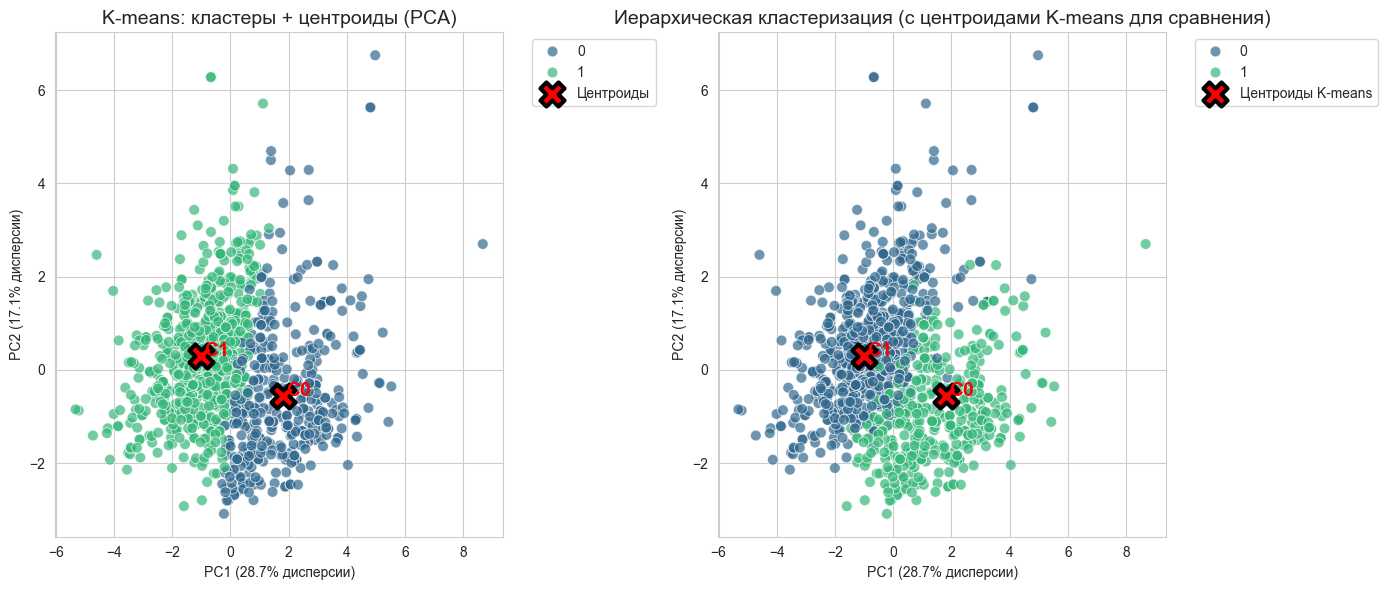

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"Доля объяснённой дисперсии двумя главными компонентами: {pca.explained_variance_ratio_.sum():.4f}")

centroids_pca = pca.transform(kmeans_final.cluster_centers_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df_scaled['kmeans_cluster'],
    palette='viridis',
    alpha=0.7,
    s=60
)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='red', marker='X', s=300, linewidths=3, label='Центроиды', edgecolors='black'
)
for i in range(len(centroids_pca)):
    plt.text(centroids_pca[i, 0] + 0.1, centroids_pca[i, 1], f'C{i}', 
             fontsize=14, fontweight='bold', color='red')

plt.title('K-means: кластеры + центроиды (PCA)', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df_scaled['hier_cluster'],
    palette='viridis',
    alpha=0.7,
    s=60
)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='red', marker='X', s=300, linewidths=3, label='Центроиды K-means', edgecolors='black'
)
for i in range(len(centroids_pca)):
    plt.text(centroids_pca[i, 0] + 0.1, centroids_pca[i, 1], f'C{i}', 
             fontsize=14, fontweight='bold', color='red')

plt.title('Иерархическая кластеризация (с центроидами K-means для сравнения)', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Визуализация кластеров в пространстве главных компонент (PCA)

## Общая информация
- **Доля объяснённой дисперсии двумя главными компонентами**: **45.77%**  
  (Это приемлемый уровень для визуализации: две компоненты захватывают почти половину вариации данных, что позволяет увидеть основные структуры.)

## Левый график: K-means (k=2) с собственными центроидами
- Два кластера (синий — 0, зелёный — 1) **чётко разделены** в пространстве PCA.
- Кластеры компактны, имеют эллипсоидную форму.
- Центроиды (красные кресты с чёрной обводкой) расположены в центрах соответствующих облаков точек.
- Разделение визуально очень хорошее: минимальное пересечение между кластерами.

**Вывод**: K-means успешно нашёл две хорошо разделимые группы объектов.

## Правый график: Иерархическая кластеризация (Ward, k=2) с наложенными центроидами K-means
- Те же цвета кластеров (синий — 0, зелёный — 1), но метки присвоены иерархическим методом.
- Кластеры **сильно пересекаются** (много синих и зелёных точек в одной области).
- Распределение выглядит как одно большое смешанное облако с небольшим сдвигом подгрупп.
- Центроиды K-means (красные кресты) всё ещё отмечены, но они хуже соответствуют центрам новых кластеров:
  - Один центроид находится в области преимущественно зелёных точек.
  - Другой — в смешанной зоне.

**Вывод**: Иерархическая кластеризация (Ward) при k=2 даёт значительно худшее разделение по сравнению с K-means. Кластеры сильно перекрываются, что указывает на низкое качество разведения групп.

## Сравнение методов (визуальная оценка)
| Аспект                  | K-means (левый)              | Иерархическая (правый)       |
|-------------------------|------------------------------|------------------------------|
| Разделимость кластеров  | Отличная, минимальное пересечение | Плохая, сильное пересечение |
| Компактность кластеров  | Высокая                      | Средняя/низкая              |
| Соответствие центроидов | Хорошее                      | Слабое                      |
| Общее качество визуально| **Значительно лучше**        | Хуже                        |

## Итоговый вывод
- Визуализация на плоскости PCA **подтверждает превосходство K-means** над иерархической кластеризацией при k=2.
- Данные действительно имеют **две чётко выраженные группы**, которые K-means успешно выделяет.
- Иерархический метод (Ward) не справляется с разделением так же эффективно — возможно, из-за чувствительности к шуму или формы кластеров.
- **Рекомендация**: Использовать **результаты K-means** как основную кластеризацию. Кластеры интерпретируемы, компактны и хорошо разделены.